In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r'train_processed.csv')
df.head(5)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [4]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestRegressor

RandomForest considering all features

In [5]:
model = RandomForestRegressor()

In [6]:
y = df['SalePrice']
x = df.drop(['SalePrice','Id'],axis=1)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [9]:
ypred = model.predict(x_test)

Test RMSE

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

0.1318831937504089

In [11]:
ypred_train = model.predict(x_train)

Train RMSE

In [12]:
np.sqrt(mean_squared_error(y_train,ypred_train))

0.052865072436924156

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, ypred))

0.885117602652983


In [14]:
print(r2_score(y_train,ypred_train))

0.9826913192539163


In [15]:
ypred_norm = np.expm1(model.predict(x_test))

In [16]:
ytest_norm = np.expm1(y_test)

In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

30782.30637185441

C:\Users\TEKANA\Anaconda3\envs\TAP_project\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.885117602652983

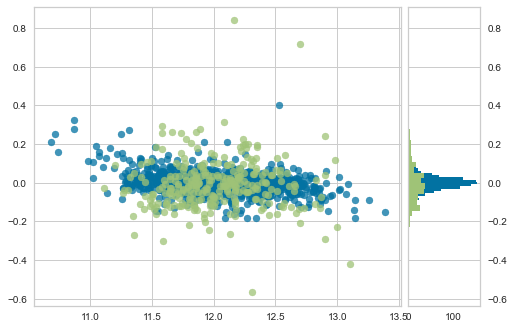

In [18]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)


Random forest with hyperparameter tuning

In [19]:
#Random forest with hyperparameter tuning
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)

In [20]:
regressor = RandomForestRegressor()

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
params = {
    'n_estimators':range(10,200,20),
    'min_samples_leaf':range(1,5,1),
    'max_depth':range(3,20,1),   
}

In [23]:
grid_search = GridSearchCV(estimator=regressor,param_grid=params,
                               cv=5,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True)

In [24]:
#grid_search.fit(x_train,y_train)

In [25]:
#grid_search.best_estimator_

In [26]:
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=13, max_features='sqrt', n_estimators=110)

In [28]:
ypred = regressor.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

0.15164755969470858

In [30]:
from sklearn.metrics import r2_score
print(r2_score(y_test, ypred))

0.8767667927957323


In [31]:
#train cc
y_pred_train = regressor.predict(x_train)

In [32]:
#train rmse
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.05484592668392391

In [33]:
print(r2_score(y_train,y_pred_train))

0.9802677179048126


In [34]:
importances = regressor.feature_importances_

In [35]:
indices = np.argsort(importances)[::-1]

In [36]:
names = [x_train.columns[i] for i in indices]

In [39]:
# plt.figure(figsize=(15, 7)) # Create plot
# plt.title("Top 10 Most Important Features") # Create plot title
# plt.bar(range(10), importances[indices][:10]) # Add bars
# plt.xticks(range(10), names[:10], rotation=90)